<a href="https://colab.research.google.com/github/prem15-gif/Artificial_Intelligence_Lab_SE_A_16/blob/master/Simple_Python_Programs/DSEXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

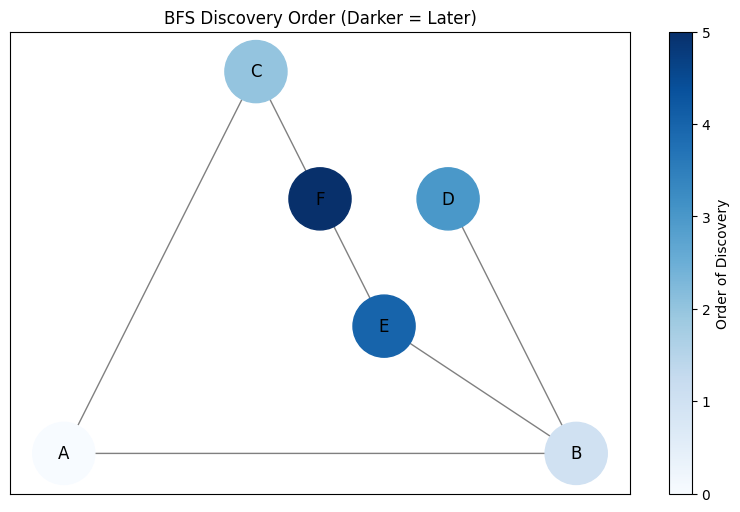

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# 1. Setup the Graph
graph_dict = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}
G = nx.DiGraph(graph_dict)

# 2. Run BFS to get the visit order
def get_bfs_order(graph, start):
    visited = []
    queue = deque([start])
    visited_set = {start}

    while queue:
        node = queue.popleft()
        visited.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited_set:
                visited_set.add(neighbor)
                queue.append(neighbor)
    return visited

order = get_bfs_order(graph_dict, 'A')

# 3. Create a color map (Light to Dark)
# Nodes visited earlier will be a different color than nodes visited later
color_map = []
for node in G:
    if node in order:
        # Assign a color intensity based on its position in the BFS order
        color_map.append(order.index(node))
    else:
        color_map.append(0)

# 4. Visualization
plt.figure(figsize=(10, 6))
pos = nx.planar_layout(G) # Clean layout for tree-like structures

nodes = nx.draw_networkx_nodes(G, pos, node_size=2000,
                               node_color=color_map,
                               cmap=plt.cm.Blues) # Uses a blue color gradient

nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("BFS Discovery Order (Darker = Later)")
plt.colorbar(nodes, label="Order of Discovery")
plt.show()

DFS Visit Order: ['A', 'B', 'D', 'E', 'F', 'C']


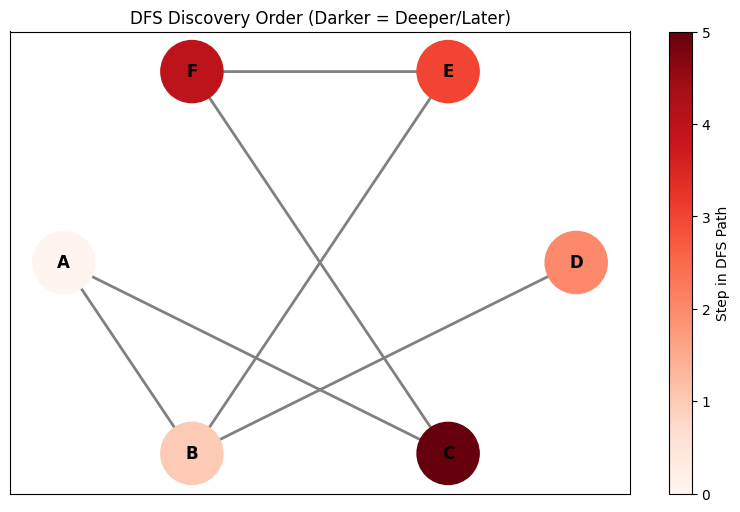

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Setup the Graph
graph_dict = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}
G = nx.DiGraph(graph_dict)

# 2. Run DFS to get the visit order
def get_dfs_order(graph, start, visited=None, order=None):
    if visited is None:
        visited = set()
    if order is None:
        order = []

    visited.add(start)
    order.append(start)

    for neighbor in graph[start]:
        if neighbor not in visited:
            get_dfs_order(graph, neighbor, visited, order)
    return order

# Get the DFS sequence
dfs_order = get_dfs_order(graph_dict, 'A')
print(f"DFS Visit Order: {dfs_order}")

# 3. Create a color map (Light to Dark Red)
color_map = []
for node in G.nodes():
    # Find the index of the node in the DFS order to determine its color intensity
    color_map.append(dfs_order.index(node))

# 4. Visualization
plt.figure(figsize=(10, 6))
pos = nx.shell_layout(G) # Using a different layout to distinguish from BFS

nodes = nx.draw_networkx_nodes(G, pos, node_size=2000,
                               node_color=color_map,
                               cmap=plt.cm.Reds) # Red gradient for DFS

nx.draw_networkx_edges(G, pos, arrowsize=20, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("DFS Discovery Order (Darker = Deeper/Later)")
plt.colorbar(nodes, label="Step in DFS Path")
plt.show()